# **CHENNAI HOUSE PRICE PREDICTION**

## **MODEL TYPE**

> SUPERVISED LEARNING

> REGRESSION





**IMPORTING THE REQUIRED LIBRARIES**

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#Basic
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


#Linear model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

#preprocessing
from sklearn.preprocessing import StandardScaler

#KNN
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

#XGBoost
import xgboost as xgb

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [165]:
#TO DISPLAY ALL THE COLUMNS & ROWS
pd.pandas.set_option("display.max_columns",None)


# **LOAD DATA**

In [166]:
ds=pd.read_csv("/content/train-chennai-sale.csv")

In [167]:
#View the data
ds.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [168]:
ds.shape

(7109, 22)

In [169]:
#Basic informayion about the data
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [170]:
#Describing the data
ds.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [171]:
ds.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [172]:
#Dropping the unnecessary columns
ds=ds.drop(columns="PRT_ID")

In [173]:
ds.head(2)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770


# **DATA HANDLING**

In [174]:
#finding the duplicates
#"0" represents then there is not a single duplicate value present in our dataset
ds.duplicated().sum()


0

In [175]:
#Here we will chechk the percentage of nan values in the columns
features_with_na=[features for features in ds.columns if ds[features].isnull().sum()>0]

for feature in features_with_na:
  print(feature,np.round(ds[feature].isnull().mean(), 4), "% missing values")

N_BEDROOM 0.0001 % missing values
N_BATHROOM 0.0007 % missing values
QS_OVERALL 0.0068 % missing values


In [176]:
#Dropping the rows with Nan Values

In [177]:
ds2=ds.dropna().reset_index(drop=True)
print(ds2)

            AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0     Karapakkam      1004  04-05-2011            131        1.0         1.0   
1     Anna Nagar      1986  19-12-2006             26        2.0         1.0   
2          Adyar       909  04-02-2012             70        1.0         1.0   
3      Velachery      1855  13-03-2010             14        3.0         2.0   
4     Karapakkam      1226  05-10-2009             84        1.0         1.0   
...          ...       ...         ...            ...        ...         ...   
7051  Karapakkam       598  03-01-2011             51        1.0         1.0   
7052   Velachery      1897  08-04-2004             52        3.0         2.0   
7053   Velachery      1614  25-08-2006            152        2.0         1.0   
7054  Karapakkam       787  03-08-2009             40        1.0         1.0   
7055   Velachery      1896  13-07-2005            156        3.0         2.0   

      N_ROOM    SALE_COND PARK_FACIL  D

In [178]:
ds.shape

(7109, 21)

In [179]:
ds2.shape
#We dropped the rows containing nan values

(7056, 21)

In [180]:
features_with_na=[features for features in ds2.columns if ds2[features].isnull().sum()>0]

for feature in features_with_na:
  print(feature,np.round(ds2[feature].isnull().mean(), 4), "% missing values")

###**No missing values found**

In [181]:
ds2.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [182]:
#Adding the "PRICE_PER_SQFEET" column for better understanding
ds2["PRICE_PER_SQFEET"]=ds2["SALES_PRICE"]/ds2["INT_SQFT"]

In [183]:
#Conversion of "DATE_SALE" and "DATE_BUILD" to find the age of building and creating a new column
import datetime as dt
ds2["DATE_SALE"]=pd.to_datetime(ds2["DATE_SALE"], format="%d-%m-%Y")
ds2["DATE_BUILD"]=pd.to_datetime(ds2["DATE_BUILD"], format="%d-%m-%Y")

In [184]:
ds2['AGE'] = (ds2['DATE_SALE'].dt.year - ds2['DATE_BUILD'].dt.year).astype(int)
ds2.loc[ds2['DATE_SALE'].dt.month < ds2['DATE_BUILD'].dt.month, 'AGE'] = ds2['AGE'] - 1
ds2.loc[(ds2['DATE_SALE'].dt.month == ds2['DATE_BUILD'].dt.month) & (ds2['DATE_SALE'].dt.day < ds2['DATE_BUILD'].dt.day), 'AGE'] = ds2['AGE'] - 1

In [185]:
ds2=ds2.drop(columns = "DATE_SALE")
ds2=ds2.drop(columns = "DATE_BUILD")

In [186]:
#Placing the position of columns respectively
ds2=ds2.loc[:,["AREA","INT_SQFT","PRICE_PER_SQFEET","AGE","DIST_MAINROAD","N_BEDROOM","N_BATHROOM","N_ROOM",
          "SALE_COND","PARK_FACIL","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE",
          "QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL","REG_FEE","COMMIS","SALES_PRICE"]]

In [187]:
ds2.head(2)

,AREA,INT_SQFT,PRICE_PER_SQFEET,AGE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,7569.721116,43,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,10935.433031,10,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770


#**CHECKING FOR CORRELATIONS & OUTLIERS**

In [188]:
ds2.corr()

,INT_SQFT,PRICE_PER_SQFEET,AGE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
INT_SQFT,1.000000,-0.445248,-0.013771,0.002267,0.786721,0.517103,0.951305,0.020495,-0.007249,0.009643,0.013830,0.658005,0.571667,0.612668
PRICE_PER_SQFEET,-0.445248,1.000000,-0.138909,0.014759,-0.440870,-0.385695,-0.394793,0.004126,-0.006173,0.012450,0.008480,0.204560,0.028160,0.387036
AGE,-0.013771,-0.138909,1.000000,-0.003094,-0.045736,-0.019039,-0.034469,0.019457,0.023894,-0.016569,0.013129,-0.118106,-0.089447,-0.120611
DIST_MAINROAD,0.002267,0.014759,-0.003094,1.000000,-0.001938,0.002496,0.002313,0.002739,-0.030999,0.001141,-0.017482,0.011144,0.010203,0.018062
N_BEDROOM,0.786721,-0.440870,-0.045736,-0.001938,1.000000,0.756016,0.840654,0.015508,-0.006461,0.015810,0.013932,0.456759,0.431035,0.332595
N_BATHROOM,0.517103,-0.385695,-0.019039,0.002496,0.756016,1.000000,0.570110,0.013487,-0.011091,0.012278,0.007858,0.262570,0.258199,0.110984
N_ROOM,0.951305,-0.394793,-0.034469,0.002313,0.840654,0.570110,1.000000,0.016710,-0.006636,0.015618,0.015234,0.631578,0.534058,0.603417
QS_ROOMS,0.020495,0.004126,0.019457,0.002739,0.015508,0.013487,0.016710,1.000000,0.009111,0.009570,0.517906,0.020699,0.009068,0.022278
QS_BATHROOM,-0.007249,-0.006173,0.023894,-0.030999,-0.006461,-0.011091,-0.006636,0.009111,1.000000,-0.012320,0.551172,-0.007145,-0.001381,-0.012346
QS_BEDROOM,0.009643,0.012450,-0.016569,0.001141,0.015810,0.012278,0.015618,0.009570,-0.012320,1.000000,0.630583,0.022313,0.020660,0.020079


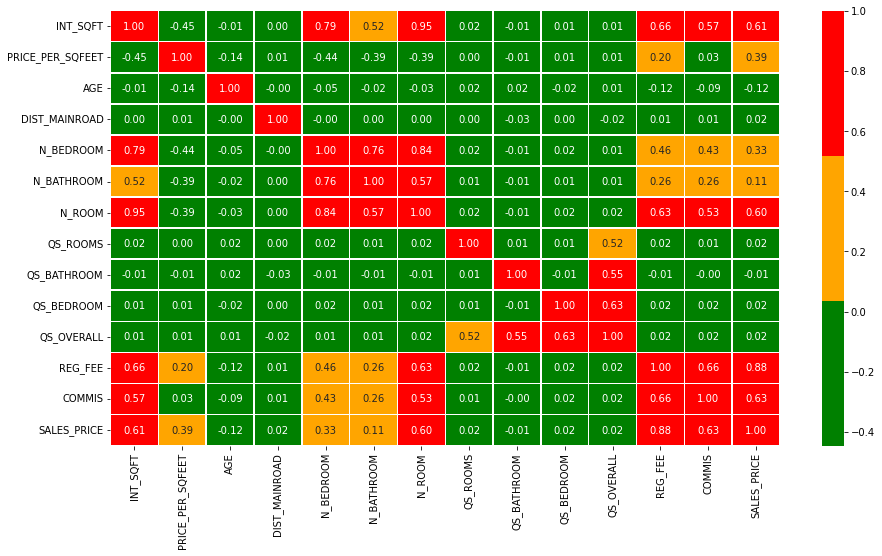

In [189]:
plt.figure(figsize=(15,8))
sns.heatmap(ds2.corr(),annot=True,linewidth=0.5,fmt=".2f",cmap=["Green","Orange","Red"])
#so what color provide the information is
#Green=>Lightly correlated
#Orange=>Correlated but does not affect
#Red=>Highly correlated

### **From this heatmap waht we get is feature columns "N_ROOM" is highly correlated to "INT_SQFT" ,"REG_FEE & COMMIS" are highly correlated to Target column "SALES PRICE".So in conclusion if they are highly correlated we can eliminate those columns**

In [190]:
ds2.PRICE_PER_SQFEET.describe()

count     7056.000000
mean      8245.223564
std       2459.162150
min       2983.242134
25%       6380.135592
50%       7923.932387
75%       9823.141898
max      18543.860759
Name: PRICE_PER_SQFEET, dtype: float64

In [191]:
import plotly.express as px
fig=px.box(ds2,y="PRICE_PER_SQFEET")
fig.show()


In [192]:
def remove(df_in):
  df_final = pd.DataFrame()
  for i,j in df_in.groupby('AREA'):
    M = j['PRICE_PER_SQFEET'].mean()
    STD = np.std(j['PRICE_PER_SQFEET'])
    cleaned = j[(j['PRICE_PER_SQFEET'] > (M-3*STD)) & (j['PRICE_PER_SQFEET'] <= (M+3*STD))]
    df_final = pd.concat([df_final,cleaned],ignore_index=True)
  
  return df_final

In [193]:
ds3=remove(ds2)
ds3.shape

(7041, 21)

In [194]:
ds2.shape

(7056, 21)

In [195]:
ds3.shape

(7041, 21)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



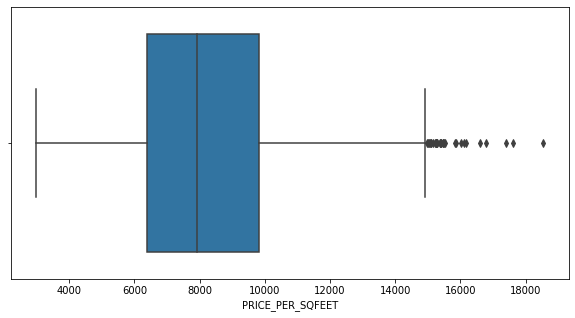

In [196]:
fig=plt.figure(figsize=(10,5))
sns.boxplot(ds2["PRICE_PER_SQFEET"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



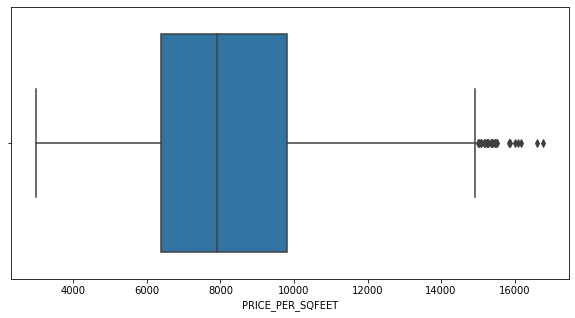

In [197]:
fig=plt.figure(figsize=(10,5))
sns.boxplot(ds3["PRICE_PER_SQFEET"])

**CORRECTING THE DATA FOR EASY ACCESING**

### **AREA-BEFORE & AFTER**

In [198]:
ds3["AREA"].unique()

array(['Adyar', 'Ana Nagar', 'Ann Nagar', 'Anna Nagar', 'Chormpet',
       'Chrmpet', 'Chrompet', 'Chrompt', 'KK Nagar', 'Karapakam',
       'Karapakkam', 'T Nagar', 'TNagar', 'Velachery', 'Velchery'],
      dtype=object)

In [199]:
ds3["AREA"].value_counts()

Chrompet      1670
Karapakkam    1346
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          766
T Nagar        490
Chrompt          9
Chrmpet          6
Chormpet         5
TNagar           5
Ana Nagar        3
Karapakam        3
Ann Nagar        2
Velchery         2
Name: AREA, dtype: int64

In [200]:
ds3["AREA"]=ds3["AREA"].replace({"Karapakam":"Karapakkam",
             "Ana Nagar":"Anna Nagar","Ann Nagar":"Anna Nagar",
             "TNagar":"T. Nagar","TNagar":"T. Nagar","T Nagar":"T. Nagar",
             "Adyr":"Adyar",
             "Chrompet":"Chromepet","Chrompt":'Chromepet',"Chormpet":"Chromepet","Chrmpet":"Chromepet",
             "Velchery":"Velachery",
             "KK Nagar":"K. K. Nagar","KKNagar":"K. K. Nagar"})

In [201]:
ds3["AREA"].unique()

array(['Adyar', 'Anna Nagar', 'Chromepet', 'K. K. Nagar', 'Karapakkam',
       'T. Nagar', 'Velachery'], dtype=object)

In [202]:
ds3["AREA"].value_counts()

Chromepet      1690
Karapakkam     1349
K. K. Nagar     989
Velachery       975
Anna Nagar      777
Adyar           766
T. Nagar        495
Name: AREA, dtype: int64

**SALE_COND-BEFORE & AFTER**

In [203]:
ds3["SALE_COND"].unique()

array(['AbNormal', 'Partial', 'Normal Sale', 'Family', 'AdjLand',
       'Partiall', 'Adj Land', 'PartiaLl', 'Ab Normal'], dtype=object)

In [204]:
ds3["SALE_COND"].value_counts()

AdjLand        1420
Normal Sale    1414
Partial        1413
AbNormal       1393
Family         1388
Adj Land          5
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

In [205]:
ds3["SALE_COND"]=ds3["SALE_COND"].replace({'AbNormal':"Abnormal",'Ab Normal':"Abnormal",'Adj Land':"AdjLand",'PartiaLl':"Partial",'Partiall':"Partial"})

In [206]:
ds3["SALE_COND"].unique()

array(['Abnormal', 'Partial', 'Normal Sale', 'Family', 'AdjLand'],
      dtype=object)

In [207]:
ds3["SALE_COND"].value_counts()

AdjLand        1425
Partial        1416
Normal Sale    1414
Abnormal       1398
Family         1388
Name: SALE_COND, dtype: int64

### **PARK_FACIL-BEFORE & AFTER**

In [208]:
ds3["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [209]:
ds3["PARK_FACIL"].value_counts()

Yes    3547
No     3493
Noo       1
Name: PARK_FACIL, dtype: int64

In [210]:
ds3["PARK_FACIL"]=ds3["PARK_FACIL"].replace({"Yes":"Yes","Noo":"No"})

In [211]:
ds3["PARK_FACIL"].unique()

array(['Yes', 'No'], dtype=object)

In [212]:
ds3["PARK_FACIL"].value_counts()

Yes    3547
No     3494
Name: PARK_FACIL, dtype: int64

### **BULDTYPE-BEFORE & AFTER**

In [213]:
ds3["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'House', 'Other', 'Comercial'],
      dtype=object)

In [214]:
ds3["BUILDTYPE"].value_counts()

House         2431
Commercial    2295
Others        2286
Other           25
Comercial        4
Name: BUILDTYPE, dtype: int64

In [215]:
ds3["BUILDTYPE"]=ds3["BUILDTYPE"].replace({"Comercial":"Commercial","Other":"Others"})

In [216]:
ds3["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [217]:
ds3["BUILDTYPE"].value_counts()

House         2431
Others        2311
Commercial    2299
Name: BUILDTYPE, dtype: int64

### **UTILITY_AVAIL-BEFORE & AFTER**

In [218]:
ds3["UTILITY_AVAIL"].unique()

array(['ELO', 'NoSewr ', 'AllPub', 'NoSeWa', 'All Pub'], dtype=object)

In [219]:
ds3["UTILITY_AVAIL"].value_counts()

AllPub     1867
NoSeWa     1858
NoSewr     1809
ELO        1506
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [220]:
ds3["UTILITY_AVAIL"]=ds3["UTILITY_AVAIL"].replace({"AllPub":"All Pub"})

In [221]:
ds3["UTILITY_AVAIL"].unique()

array(['ELO', 'NoSewr ', 'All Pub', 'NoSeWa'], dtype=object)

In [222]:
ds3["UTILITY_AVAIL"].value_counts()

All Pub    1868
NoSeWa     1858
NoSewr     1809
ELO        1506
Name: UTILITY_AVAIL, dtype: int64

### **STREET-BEFORE & AFTER**

In [223]:
ds3["STREET"].unique()

array(['Gravel', 'Paved', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [224]:
ds3["STREET"].value_counts()

Paved        2538
Gravel       2491
No Access    1993
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [225]:
ds3["STREET"]=ds3["STREET"].replace({"Pavd":"Paved","NoAccess":"No Access"})

In [226]:
ds3["STREET"].unique()

array(['Gravel', 'Paved', 'No Access'], dtype=object)

In [227]:
ds3["STREET"].value_counts()

Paved        2550
Gravel       2491
No Access    2000
Name: STREET, dtype: int64

**MZZONE-BEFORE & AFTER**

In [228]:
ds3["MZZONE"].unique()

array(['RL', 'RH', 'A', 'RM', 'C', 'I'], dtype=object)

In [229]:
ds3["MZZONE"].value_counts()

RL    1846
RH    1806
RM    1791
C      547
A      533
I      518
Name: MZZONE, dtype: int64

In [230]:
ds3["MZZONE"]=ds3["MZZONE"].replace({"RL":"Gym","RH":"Clinic","RM":"Market","C":"Mall","A":"Park","I":"Bus Stand"})

In [231]:
ds3["MZZONE"].unique()

array(['Gym', 'Clinic', 'Park', 'Market', 'Mall', 'Bus Stand'],
      dtype=object)

In [232]:
ds3["MZZONE"].value_counts()

Gym          1846
Clinic       1806
Market       1791
Mall          547
Park          533
Bus Stand     518
Name: MZZONE, dtype: int64

In [233]:
#checking if its corrected or not for first 5 columns
ds3.head(5)

,AREA,INT_SQFT,PRICE_PER_SQFEET,AGE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Adyar,909,14476.567657,19,70,1.0,1.0,3,Abnormal,Yes,Commercial,ELO,Gravel,Gym,4.1,3.8,2.2,3.09,421094,92114,13159200
1,Adyar,1056,8888.721591,25,83,1.0,1.0,3,Partial,Yes,Others,NoSewr,Paved,Clinic,2.2,3.4,3.7,3.19,319141,37546,9386490
2,Adyar,1136,7295.378521,29,69,1.0,1.0,3,Normal Sale,Yes,Others,All Pub,Paved,Park,4.6,2.6,2.9,3.35,323214,49725,8287550
3,Adyar,1130,11843.672566,29,29,1.0,1.0,3,Family,Yes,Commercial,ELO,Paved,Clinic,2.3,2.5,2.2,2.29,468417,53533,13383350
4,Adyar,730,12120.938356,38,185,1.0,1.0,2,AdjLand,Yes,House,ELO,Gravel,Gym,2.7,4.6,4.9,4.18,265449,53090,8848285


In [234]:
#checking if its corrected or not for last 5 columns
ds3.tail(5)

,AREA,INT_SQFT,PRICE_PER_SQFEET,AGE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
7036,Velachery,1897,5702.941487,8,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,Clinic,3.6,4.5,3.3,3.92,346191,205551,10818480
7037,Velachery,1614,5174.355638,27,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,Bus Stand,4.3,4.2,2.9,3.84,317354,167028,8351410
7038,Velachery,1896,5261.856540,43,156,3.0,2.0,5,Partial,Yes,Others,ELO,Paved,Bus Stand,3.1,3.5,4.3,3.64,349177,79812,9976480
7039,Velachery,1696,8015.701651,8,189,2.0,1.0,4,Partial,No,Commercial,ELO,Gravel,Bus Stand,3.4,2.7,3.1,3.00,475812,163136,13594630
7040,Velachery,1933,4751.231247,18,3,3.0,2.0,5,Family,Yes,House,ELO,Gravel,Park,2.5,3.4,3.9,3.33,330629,119394,9184130


In [235]:
#checking if its corrected or not between the columns
ds3.iloc[5001:5020]

,AREA,INT_SQFT,PRICE_PER_SQFEET,AGE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
5001,Karapakkam,1308,6301.414373,32,9,1.0,1.0,3,AdjLand,Yes,Others,ELO,Paved,Clinic,2.2,3.8,3.2,3.08,395628,107149,8242250
5002,Karapakkam,508,13208.169291,48,67,1.0,1.0,2,AdjLand,Yes,Commercial,ELO,Gravel,Bus Stand,5.0,4.8,3.6,4.38,214712,161034,6709750
5003,Karapakkam,1665,6915.015015,9,122,2.0,2.0,4,AdjLand,No,Commercial,All Pub,No Access,Bus Stand,3.1,4.2,4.4,3.95,368432,92108,11513500
5004,Karapakkam,724,11095.649171,30,77,1.0,1.0,2,Normal Sale,Yes,Commercial,All Pub,Paved,Clinic,2.3,3.4,3.2,2.99,393629,184765,8033250
5005,Karapakkam,516,6456.879845,32,186,1.0,1.0,2,Partial,No,Commercial,NoSewr,No Access,Park,2.8,5.0,5.0,4.34,149929,63303,3331750
5006,Karapakkam,1530,7873.366013,10,128,2.0,2.0,4,Family,No,Commercial,NoSewr,No Access,Market,3.4,2.5,3.8,3.29,481850,301156,12046250
5007,Karapakkam,1115,5582.847534,10,65,1.0,1.0,3,Normal Sale,No,Others,ELO,No Access,Clinic,4.8,2.4,3.1,3.40,186746,62249,6224875
5008,Karapakkam,939,5672.523962,23,169,1.0,1.0,3,Normal Sale,Yes,House,All Pub,No Access,Mall,3.3,4.6,5.0,4.37,260999,111857,5326500
5009,Karapakkam,1145,5987.554585,30,190,1.0,1.0,3,Normal Sale,No,House,NoSewr,Paved,Gym,4.3,2.6,2.3,2.99,274230,75413,6855750
5010,Karapakkam,807,9421.778191,6,67,1.0,1.0,2,Normal Sale,Yes,Others,NoSeWa,No Access,Market,3.0,3.9,4.1,3.71,235705,60827,7603375


# **EXPLORATORY DATA ANALYSIS**

### **DOING BASIC FEATURE ANALYSIS VIA PLOTTING**

In [236]:
ds4=ds3.sort_values("SALES_PRICE",ascending=True)#->>lowest to highest
ds4

,AREA,INT_SQFT,PRICE_PER_SQFEET,AGE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4866,Karapakkam,521,4139.875240,23,51,1.0,1.0,2,Partial,No,Others,ELO,No Access,Park,4.1,4.2,2.7,3.570,71177,25883,2156875
4481,Karapakkam,617,4013.573744,25,74,1.0,1.0,2,Partial,No,Others,NoSeWa,No Access,Park,2.1,3.8,5.0,3.770,118866,47051,2476375
4679,Karapakkam,681,3877.019090,48,59,1.0,1.0,2,Family,No,House,ELO,Paved,Park,2.0,4.0,4.1,3.440,132013,23762,2640250
4791,Karapakkam,592,4725.084459,38,109,1.0,1.0,2,Family,No,House,NoSewr,No Access,Mall,4.7,2.0,4.0,3.610,137065,39162,2797250
4506,Karapakkam,728,4038.118132,32,97,1.0,1.0,2,AdjLand,No,House,NoSeWa,No Access,Park,4.1,4.1,3.5,3.860,135229,64675,2939750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,T. Nagar,1921,12101.816762,11,168,2.0,1.0,5,Normal Sale,Yes,Commercial,ELO,Gravel,Market,3.7,3.6,4.3,3.945,743923,348714,23247590
5581,T. Nagar,1973,11812.975165,34,63,2.0,1.0,5,Family,Yes,Commercial,All Pub,Gravel,Market,2.6,2.9,4.9,3.710,885666,116535,23307000
1449,Anna Nagar,1993,11698.233818,18,60,2.0,1.0,5,AdjLand,No,Commercial,All Pub,Gravel,Market,4.9,2.9,4.9,4.400,722752,163202,23314580
1465,Anna Nagar,1916,12217.045929,7,15,2.0,1.0,5,Normal Sale,Yes,Commercial,All Pub,Gravel,Market,4.3,2.9,2.5,3.230,936314,444749,23407860


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



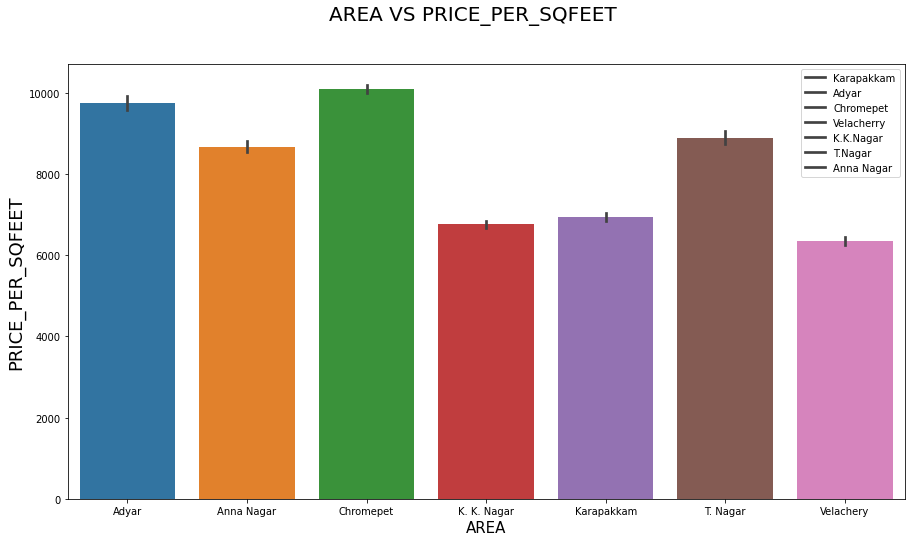

In [237]:
#1->>AREA VS PRICE_PER_SQFEET
plt.figure(figsize=(15,8))
sns.barplot("AREA","PRICE_PER_SQFEET",data=ds3)
plt.xlabel("AREA",size=15)
plt.ylabel("PRICE_PER_SQFEET",size=18)
plt.suptitle("AREA VS PRICE_PER_SQFEET",fontsize=20)
plt.legend(labels=["Karapakkam","Adyar","Chromepet","Velacherry","K.K.Nagar","T.Nagar","Anna Nagar"])
plt.show()

From this chart the insight we get is that Chromepet has the highest price per square feet compared to the other areas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



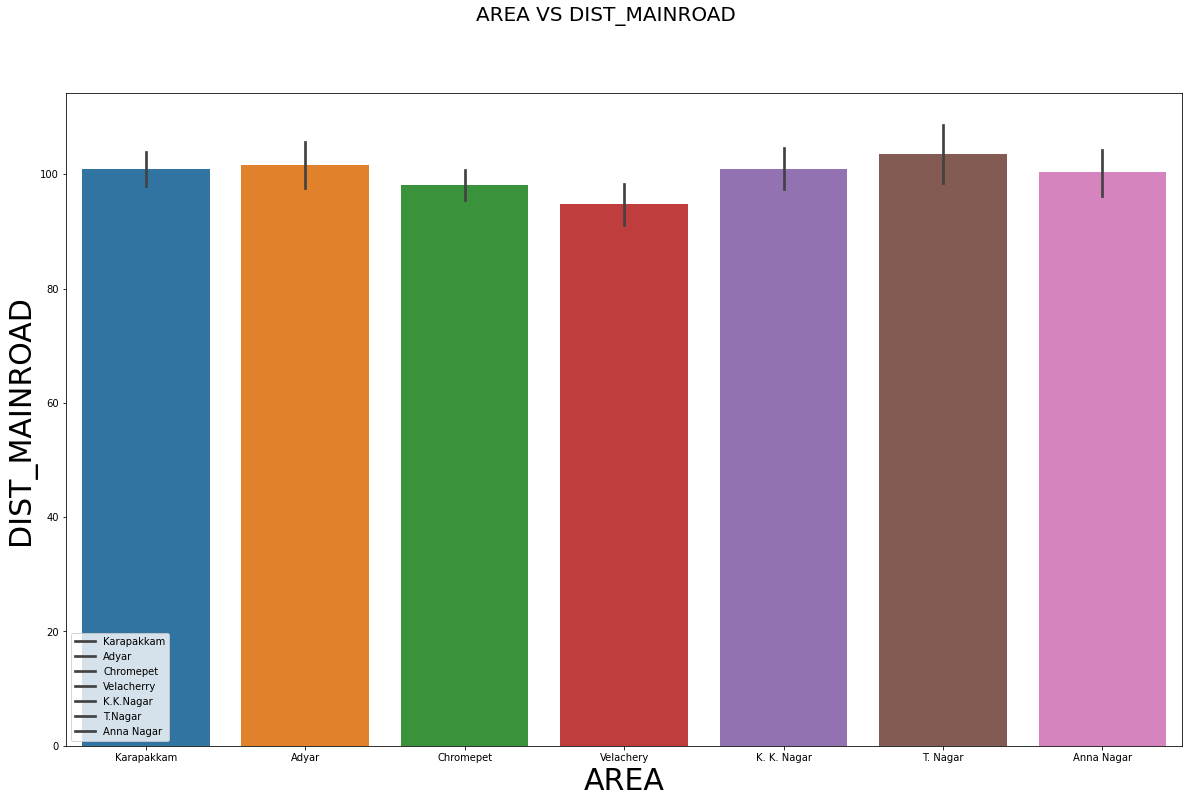

In [238]:
#2->>AREA VS DIST_MAINROAD
plt.figure(figsize=(20,12))
sns.barplot("AREA","DIST_MAINROAD",data=ds4)
plt.xlabel("AREA",size=30)
plt.ylabel("DIST_MAINROAD",size=30)
plt.suptitle("AREA VS DIST_MAINROAD",fontsize=20)
plt.legend(labels=["Karapakkam","Adyar","Chromepet","Velacherry","K.K.Nagar","T.Nagar","Anna Nagar"],loc="best")
plt.show()

From this chart the insight we get is that T.Nagar has the nearest distance to main road compared to the other areas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



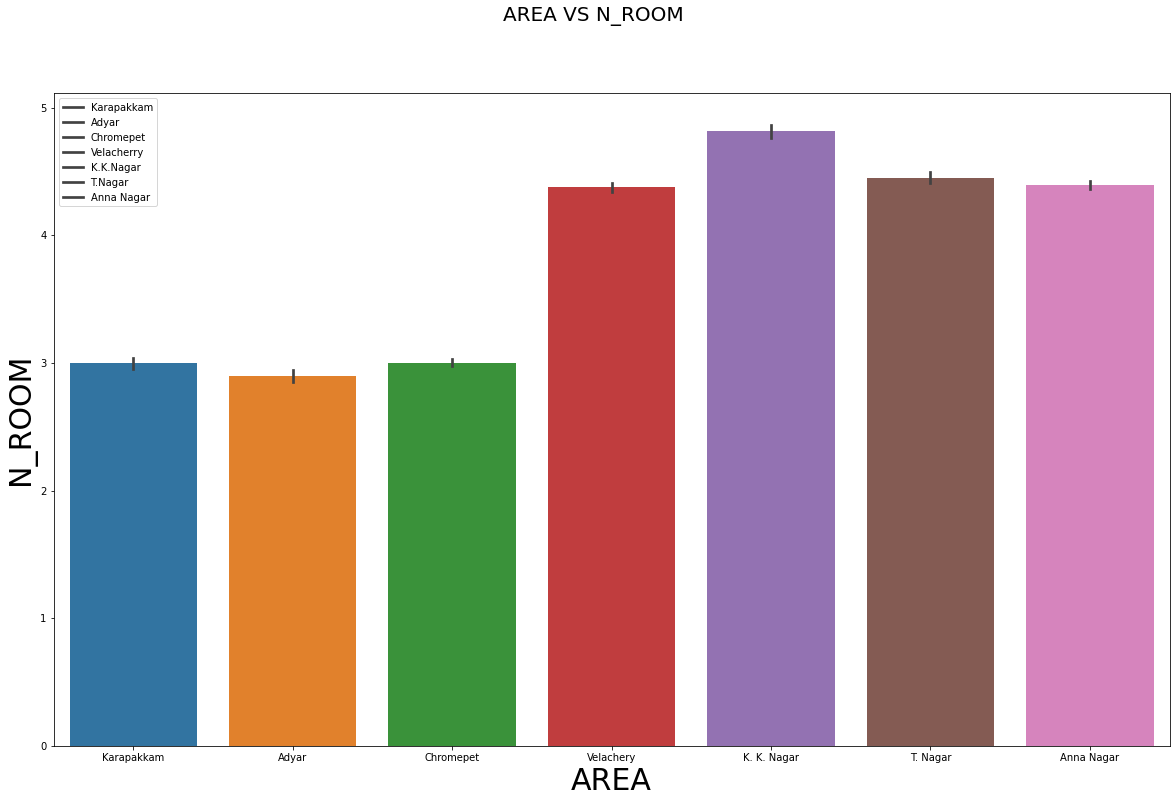

In [239]:
#3->>AREA VS N_ROOM
plt.figure(figsize=(20,12))
sns.barplot("AREA","N_ROOM",data=ds4)
plt.xlabel("AREA",size=30)
plt.ylabel("N_ROOM",size=30)
plt.suptitle("AREA VS N_ROOM",fontsize=20)
plt.legend(labels=["Karapakkam","Adyar","Chromepet","Velacherry","K.K.Nagar","T.Nagar","Anna Nagar"],loc="best")
plt.show()

From this chart the insight we get is that K.K.Nagar has the more number of rooms compared to the other areas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



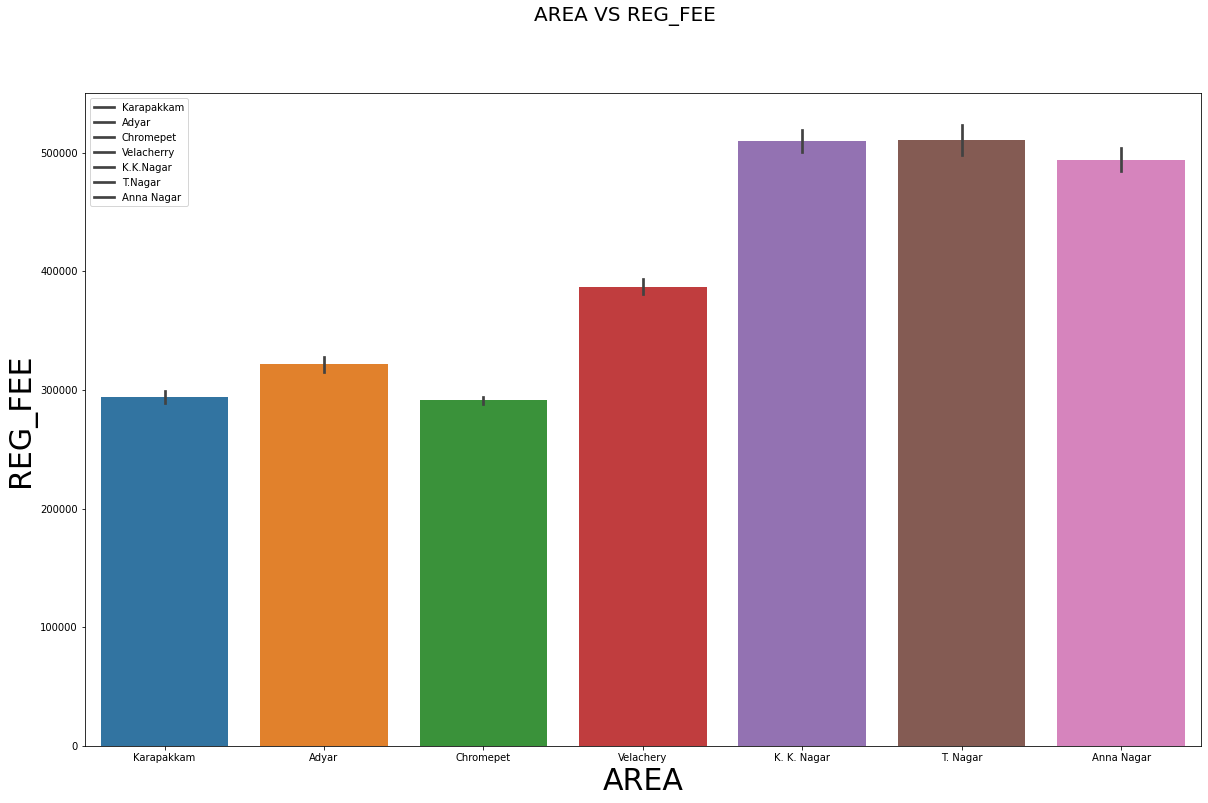

In [240]:
#4->>AREA VS REG_FEE
plt.figure(figsize=(20,12))
sns.barplot("AREA","REG_FEE",data=ds4)
plt.xlabel("AREA",size=30)
plt.ylabel("REG_FEE",size=30)
plt.suptitle("AREA VS REG_FEE",fontsize=20)
plt.legend(labels=["Karapakkam","Adyar","Chromepet","Velacherry","K.K.Nagar","T.Nagar","Anna Nagar"],loc="best")
plt.show()

From this chart the insight we get is that K.K.Nagar and T.Nagar share the same number of registration free compared to other areas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



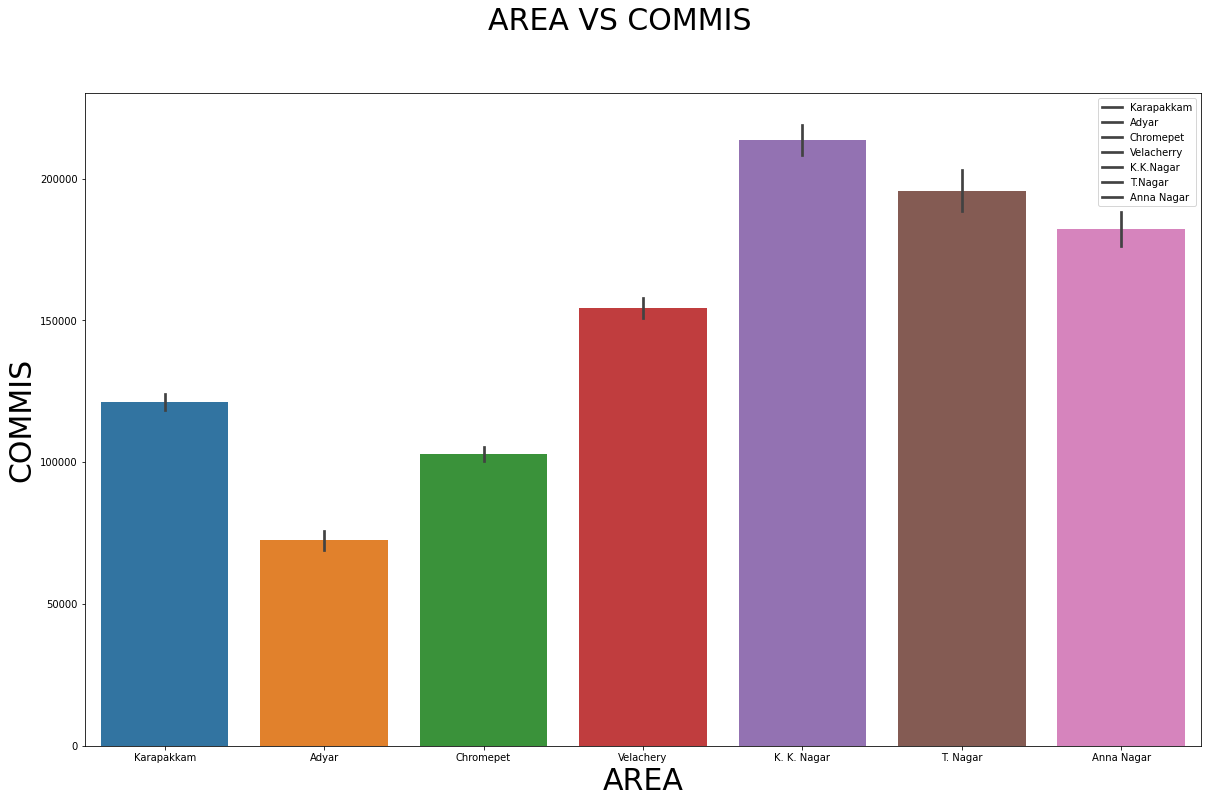

In [241]:
#5->>AREA VS COMMIS
plt.figure(figsize=(20,12))
sns.barplot("AREA","COMMIS",data=ds4)
plt.xlabel("AREA",size=30)
plt.ylabel("COMMIS",size=30)
plt.suptitle("AREA VS COMMIS ",fontsize=30)
plt.legend(labels=["Karapakkam","Adyar","Chromepet","Velacherry","K.K.Nagar","T.Nagar","Anna Nagar"],loc="best")
plt.show()

From this chart the insight we get is that K.K.Nagar charges more commision compared to the other areas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



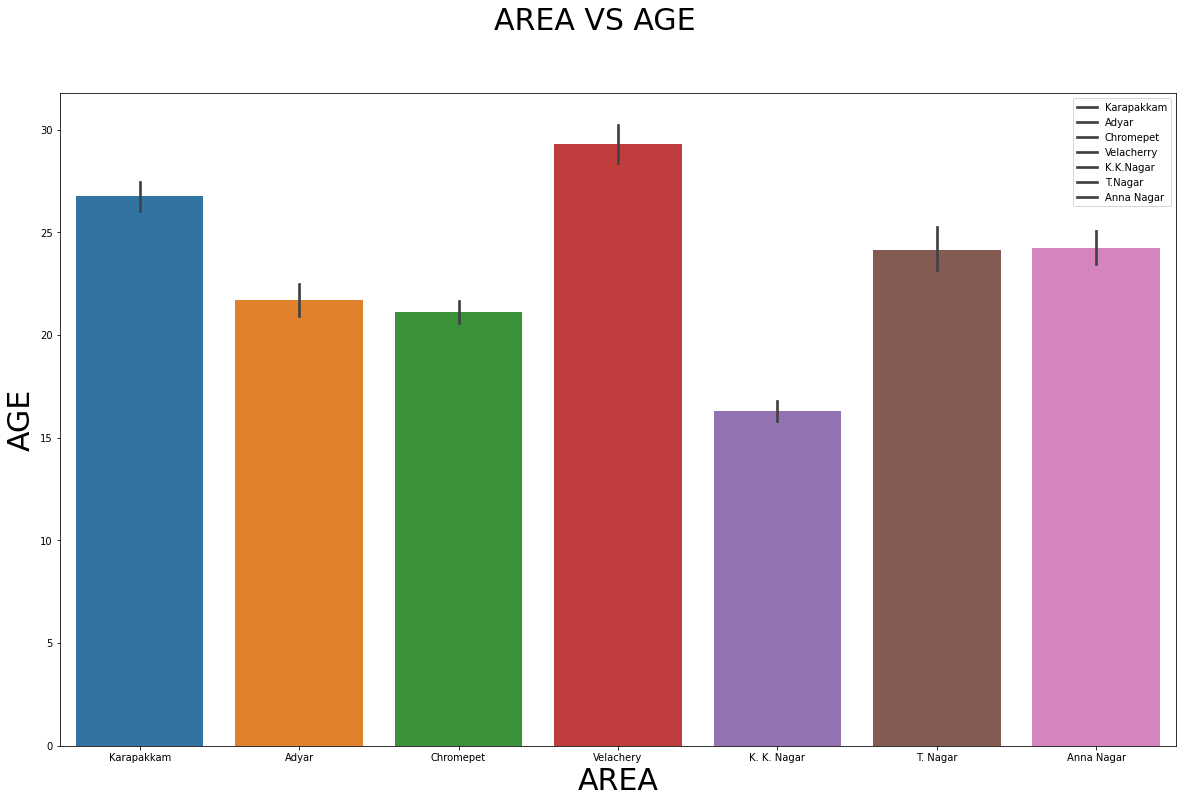

In [242]:
#6->>AREA VS AGE
plt.figure(figsize=(20,12))
sns.barplot("AREA","AGE",data=ds4)
plt.xlabel("AREA",size=30)
plt.ylabel("AGE",size=30)
plt.suptitle("AREA VS AGE ",fontsize=30)
plt.legend(labels=["Karapakkam","Adyar","Chromepet","Velacherry","K.K.Nagar","T.Nagar","Anna Nagar"],loc="best")
plt.show()

From this chart the insight we get is that Velacherry has more aged buildings  compared to the other areas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



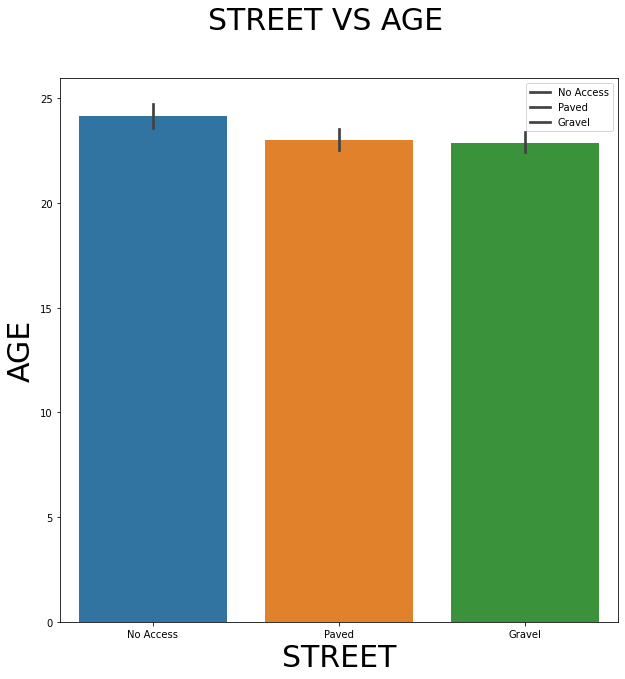

In [243]:
#7->>STREET VS AGE
plt.figure(figsize=(10,10))
sns.barplot("STREET","AGE",data=ds4)
plt.xlabel("STREET",size=30)
plt.ylabel("AGE",size=30)
plt.suptitle("STREET VS AGE ",fontsize=30)
plt.legend(labels=["No Access","Paved","Gravel"],loc="best")
plt.show()

From this chart the insight we get is that No Access type of street has more aged buildings  compared to the other areas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



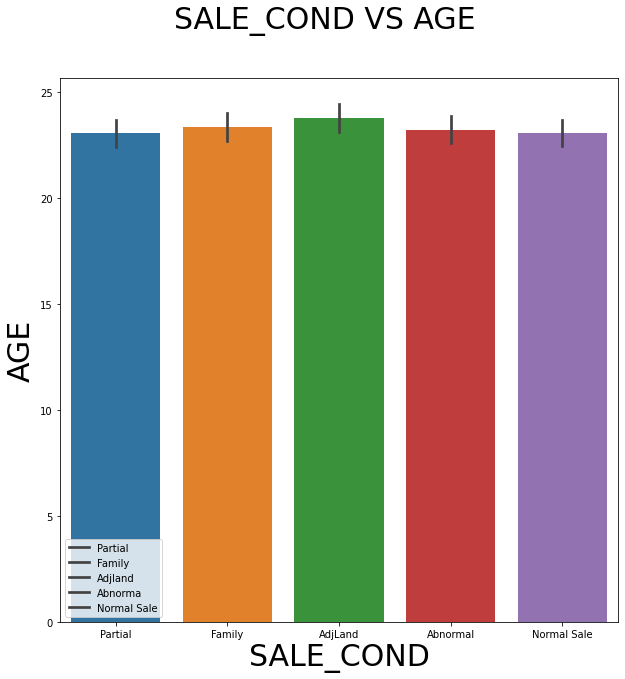

In [244]:
#8->>SALE_COND VS AGE
plt.figure(figsize=(10,10))
sns.barplot("SALE_COND","AGE",data=ds4)
plt.xlabel("SALE_COND",size=30)
plt.ylabel("AGE",size=30)
plt.suptitle("SALE_COND VS AGE ",fontsize=30)
plt.legend(labels=["Partial","Family","Adjland","Abnorma","Normal Sale"],loc="best")
plt.show()

From this chart the insight we get is that sale condition with Adjland has more aged buildings compared to the other Sale conditions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



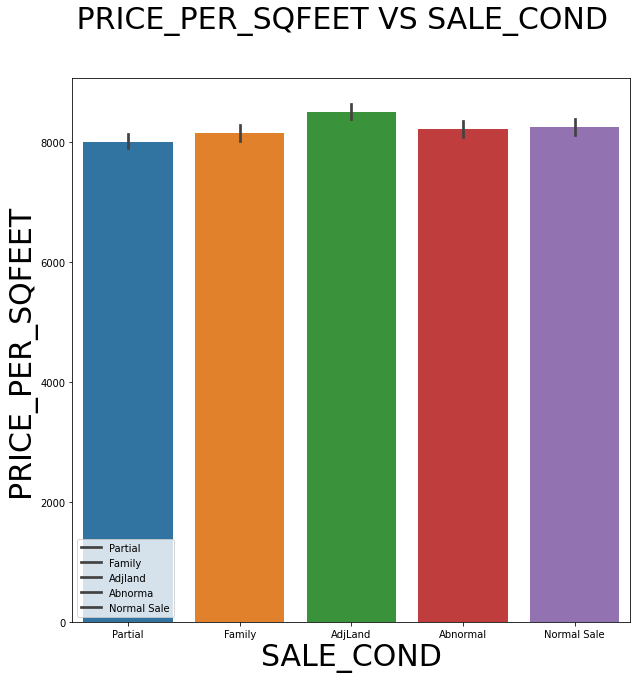

In [245]:
#9->>PRICE_PER_SQFEET VS SALE_COND
plt.figure(figsize=(10,10))
sns.barplot("SALE_COND","PRICE_PER_SQFEET",data=ds4)
plt.xlabel("SALE_COND",size=30)
plt.ylabel("PRICE_PER_SQFEET",size=30)
plt.suptitle(" PRICE_PER_SQFEET VS SALE_COND ",fontsize=30)
plt.legend(labels=["Partial","Family","Adjland","Abnorma","Normal Sale"],loc="best")
plt.show()

From this chart the insight we get is that Adjland  has more price per sq/feet compared to the other Sale condition types

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



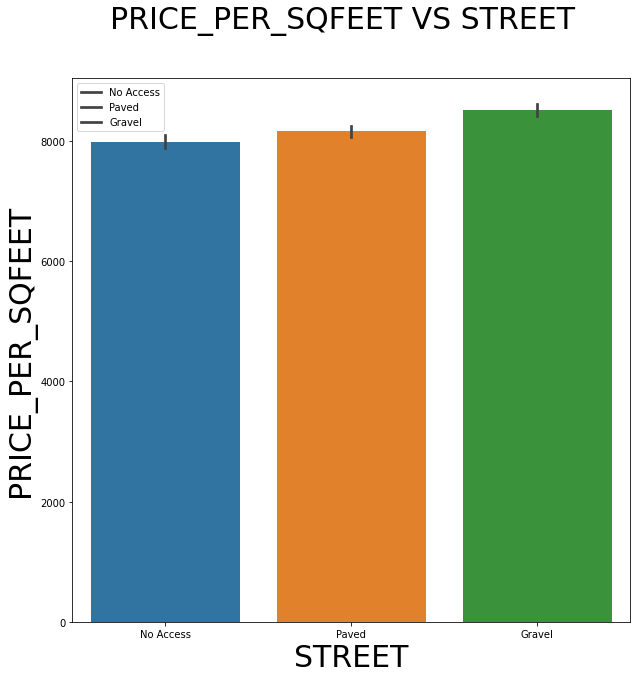

In [246]:
#10->>PRICE_PER_SQ_FEET VS STREET
plt.figure(figsize=(10,10))
sns.barplot("STREET","PRICE_PER_SQFEET",data=ds4)
plt.xlabel("STREET",size=30)
plt.ylabel("PRICE_PER_SQFEET",size=30)
plt.suptitle("PRICE_PER_SQFEET VS STREET",fontsize=30)
plt.legend(labels=["No Access","Paved","Gravel"],loc="best")
plt.show()

From this chart the insight we get is that Gravel street has more price per sq/feet compared to the other Streets

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



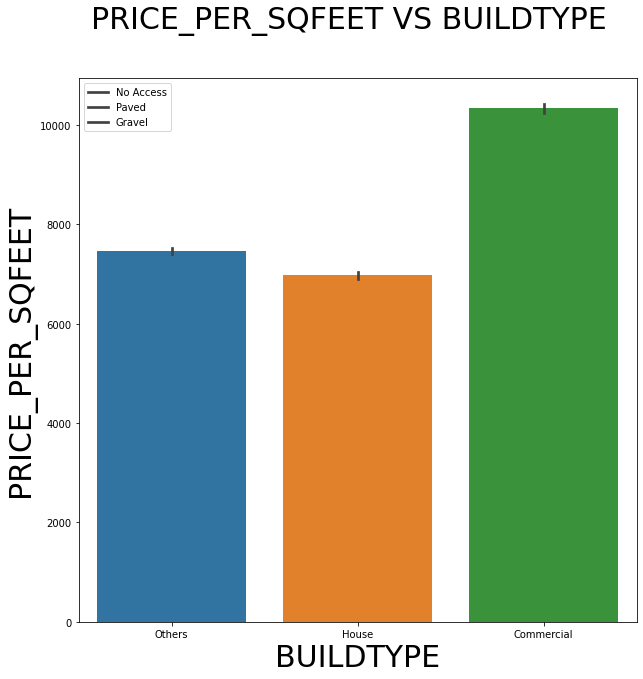

In [247]:
#11->>PRICE_PER_SQ_FEET VS BUILDTYPE
plt.figure(figsize=(10,10))
sns.barplot("BUILDTYPE","PRICE_PER_SQFEET",data=ds4)
plt.xlabel("BUILDTYPE",size=30)
plt.ylabel("PRICE_PER_SQFEET",size=30)
plt.suptitle("PRICE_PER_SQFEET VS BUILDTYPE",fontsize=30)
plt.legend(labels=["No Access","Paved","Gravel"],loc="best")
plt.show()

From this chart the insight we get is that Commercial buildings has more price per sq/feet compared to the other building types

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



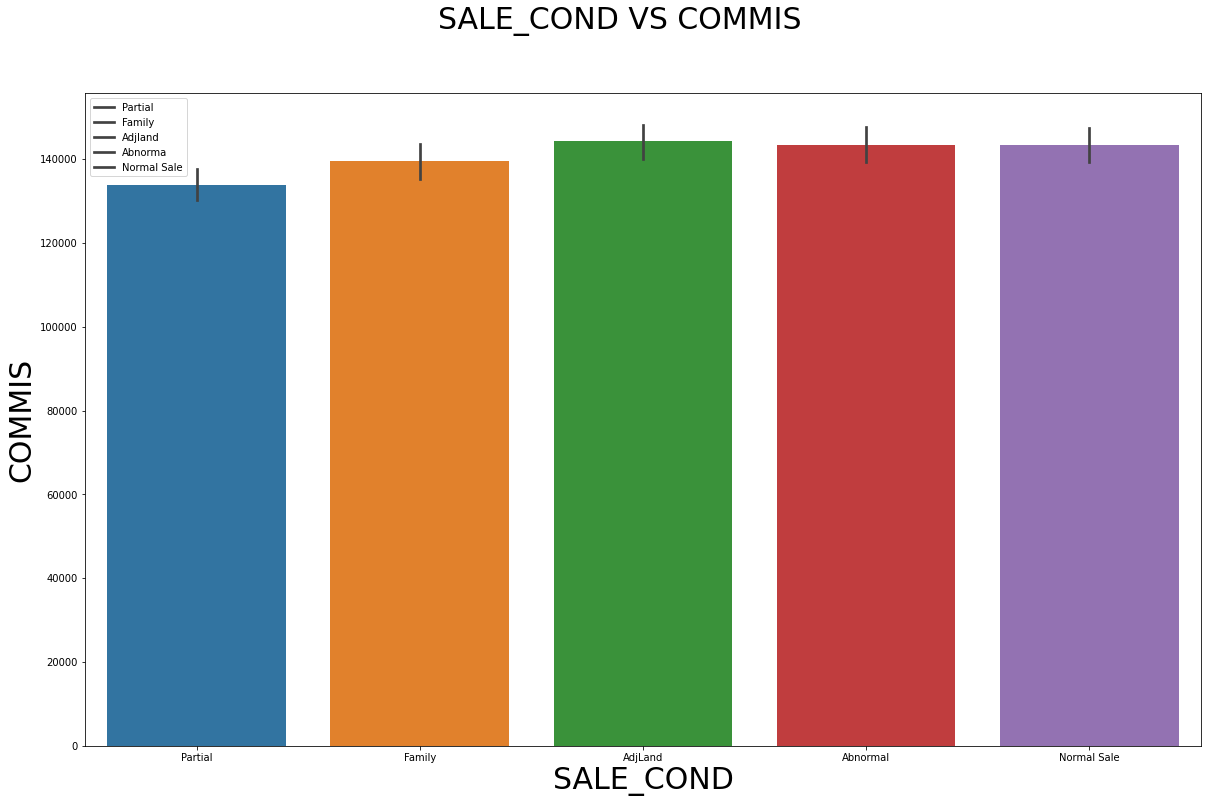

In [248]:
#12->>SALE_COND VS COMMIS
plt.figure(figsize=(20,12))
sns.barplot("SALE_COND","COMMIS",data=ds4)
plt.xlabel("SALE_COND",size=30)
plt.ylabel("COMMIS",size=30)
plt.suptitle("SALE_COND VS COMMIS ",fontsize=30)
plt.legend(labels=["Partial","Family","Adjland","Abnorma","Normal Sale"],loc="best")
plt.show()

From this chart the insight we get is that Adjland gets more commission  charges more commision compared to the other sale conditions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



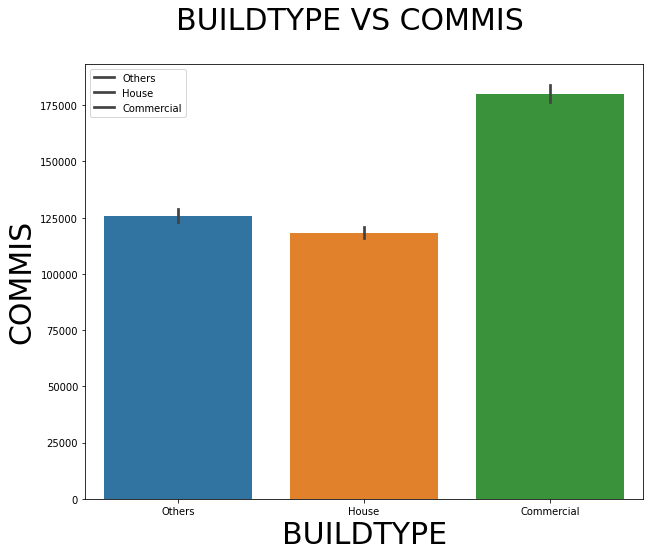

In [249]:
#13->>BUILDTYP VS COMMIS
plt.figure(figsize=(10,8))
sns.barplot("BUILDTYPE","COMMIS",data=ds4)
plt.xlabel("BUILDTYPE",size=30)
plt.ylabel("COMMIS",size=30)
plt.suptitle("BUILDTYPE VS COMMIS ",fontsize=30)
plt.legend(labels=["Others","House","Commercial"],loc="best")
plt.show()

From this chart the insight we get is that Commercial building gets  more commision compared to the other building types

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



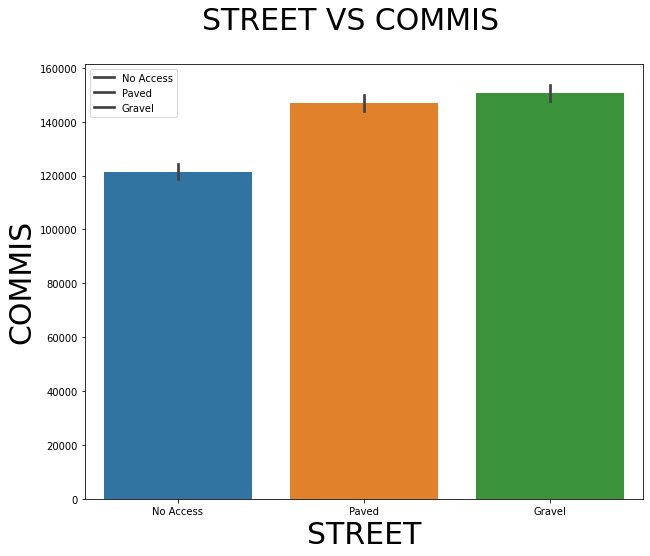

In [250]:
#14->>STREET VS COMMIS
plt.figure(figsize=(10,8))
sns.barplot("STREET","COMMIS",data=ds4)
plt.xlabel("STREET",size=30)
plt.ylabel("COMMIS",size=30)
plt.suptitle("STREET VS COMMIS ",fontsize=30)
plt.legend(labels=["No Access","Paved","Gravel"],loc="best")
plt.show()

From this chart the insight we get is that Gravel type of street gets  more commision compared to the other types of streets

In [251]:
ds4.head(2)

,AREA,INT_SQFT,PRICE_PER_SQFEET,AGE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4866,Karapakkam,521,4139.875240,23,51,1.0,1.0,2,Partial,No,Others,ELO,No Access,Park,4.1,4.2,2.7,3.57,71177,25883,2156875
4481,Karapakkam,617,4013.573744,25,74,1.0,1.0,2,Partial,No,Others,NoSeWa,No Access,Park,2.1,3.8,5.0,3.77,118866,47051,2476375


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



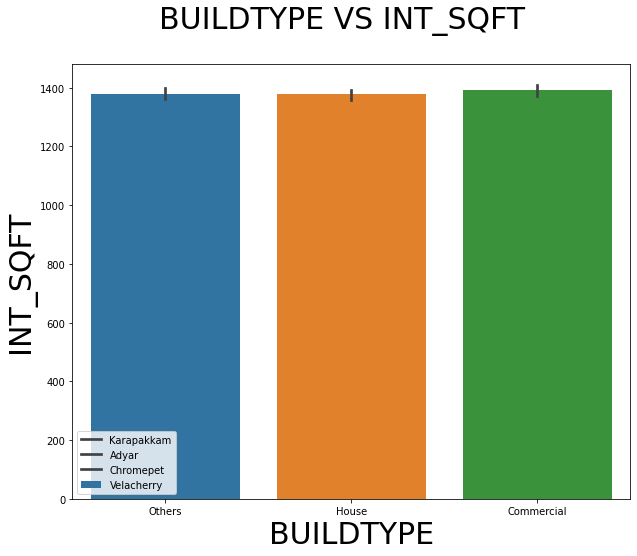

In [252]:
#16->>AREA VS SALES PRICE
plt.figure(figsize=(10,8))
sns.barplot("BUILDTYPE","INT_SQFT",data=ds4)
plt.xlabel("BUILDTYPE",size=30)
plt.ylabel("INT_SQFT",size=30)
plt.suptitle("BUILDTYPE VS INT_SQFT",fontsize=30)
plt.legend(labels=["Karapakkam","Adyar","Chromepet","Velacherry","K.K.Nagar","T.Nagar","Anna Nagar"],loc="best")
plt.show()

From this chart the insight we get is that Commercial building gets  more inch/sqfeet compared to the other building types

# **COMPARISON BETWEEN FEATURES VS TARGET**

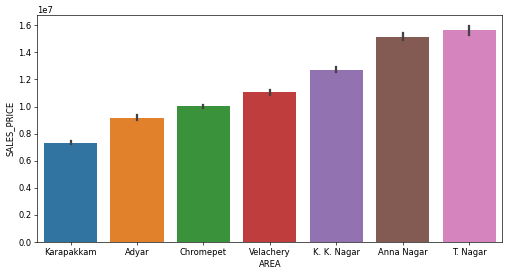

In [254]:
#16->>AREA VS SALES_PRICE
fig=plt.figure(figsize=(10,5),dpi=60)
sns.barplot(x = ds4.AREA, y = ds4.SALES_PRICE, order = ds4.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

From this chart the insight we get is that T nagar has the highest sale price compared to the other areas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



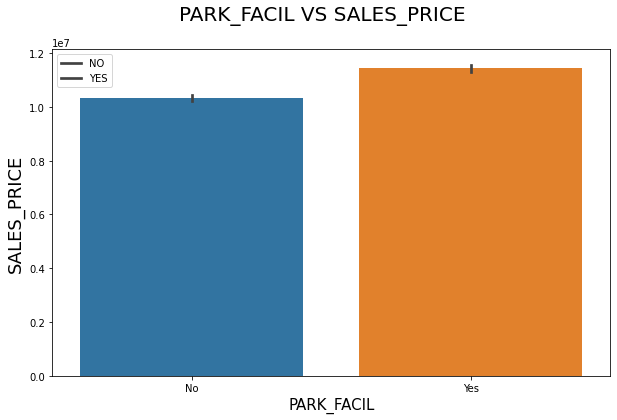

In [255]:
#17->>PARK_FACIL VS SALES_PRICE
plt.figure(figsize=(10,6))
sns.barplot("PARK_FACIL","SALES_PRICE",data=ds4)
plt.xlabel("PARK_FACIL",size=15)
plt.ylabel("SALES_PRICE",size=18)
plt.suptitle("PARK_FACIL VS SALES_PRICE",fontsize=20)
plt.legend(labels=["NO","YES"])
plt.show()

From this chart the insight we get is that sales price increases if the parking facility is available

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



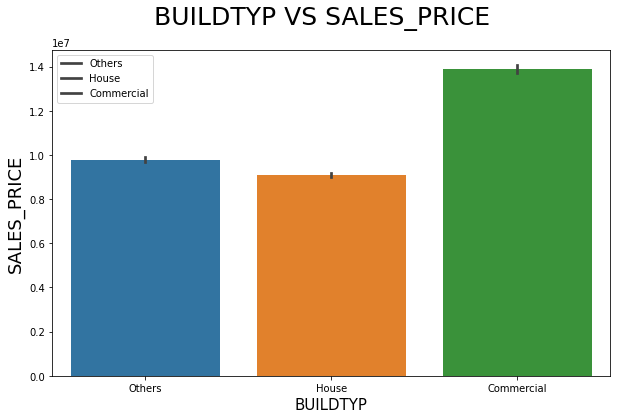

In [256]:
#18->>BUILDTYPE VS SALES_PRICE
plt.figure(figsize=(10,6))
sns.barplot("BUILDTYPE","SALES_PRICE",data=ds4)
plt.xlabel("BUILDTYP",size=15)
plt.ylabel("SALES_PRICE",size=18)
plt.suptitle("BUILDTYP VS SALES_PRICE",fontsize=25)
plt.legend(labels=["Others","House","Commercial"],loc="best")
plt.show()

From this chart the insight we get is that sales price increases if the type of the building is commercial

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



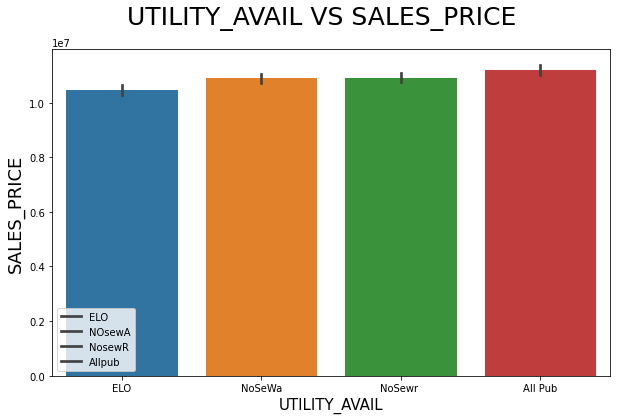

In [257]:
#19->>UTILITY_AVAIL VS SALES_PRICE
plt.figure(figsize=(10,6))
sns.barplot("UTILITY_AVAIL","SALES_PRICE",data=ds4)
plt.xlabel("UTILITY_AVAIL",size=15)
plt.ylabel("SALES_PRICE",size=18)
plt.suptitle("UTILITY_AVAIL VS SALES_PRICE",fontsize=25)
plt.legend(labels=["ELO","NOsewA","NosewR","Allpub"],loc="best")
plt.show()

From this chart the insight we get is that sales price increases if all the public utility is available near to the house

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



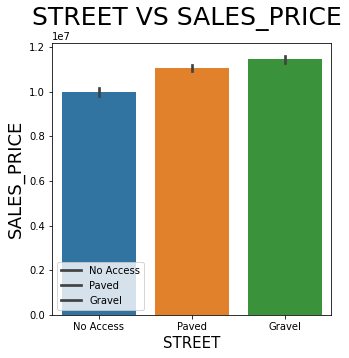

In [258]:
#20->>STREET VS SALES_PRICE
plt.figure(figsize=(5,5))
sns.barplot("STREET","SALES_PRICE",data=ds4)
plt.xlabel("STREET",size=15)
plt.ylabel("SALES_PRICE",size=18)
plt.suptitle("STREET VS SALES_PRICE",fontsize=25)
plt.legend(labels=["No Access","Paved","Gravel"],loc="best")
plt.show()

From this chart the insight we get is that sales price increases if street type is Gravel

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



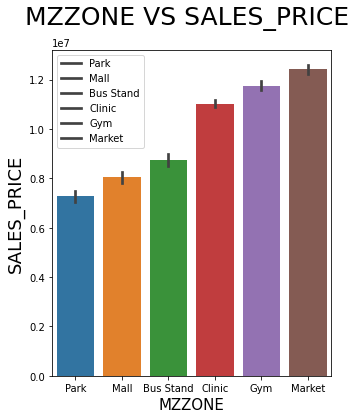

In [259]:
#21->>MZZONE VS SALES_PRICE
plt.figure(figsize=(5,6))
sns.barplot("MZZONE","SALES_PRICE",data=ds4)
plt.xlabel("MZZONE",size=15)
plt.ylabel("SALES_PRICE",size=18)
plt.suptitle("MZZONE VS SALES_PRICE",fontsize=25)
plt.legend(labels=["Park","Mall","Bus Stand","Clinic","Gym","Market"],loc="best")
plt.show()

From this chart the insight we get is that sales price increases if market is nearby to the house(Since this is masked data i just gave my own thoughts of places)

# **TO DROP THE NON LINEAR RELAIONSHIP OF FEATURES WITH VARIOUS PLOTTING TYPES**

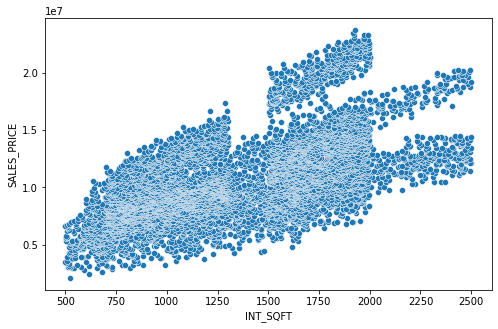

In [260]:
#21
fig=plt.figure(figsize=(8,5))
sns.scatterplot(data=ds4, x="INT_SQFT", y="SALES_PRICE")

This scatter plot defines that "SALES_PRICE" increases linearly with increase in "INT_SQFT"

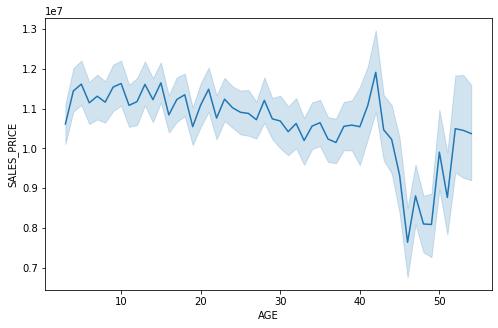

In [261]:
#22
fig=plt.figure(figsize=(8,5))
sns.lineplot(data=ds4, x="AGE", y="SALES_PRICE")

This Line plot defines that "AGE" of building increases with decrease in "SALEs_PRICE"

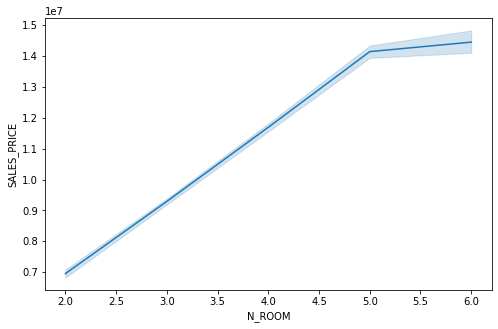

In [262]:
#23
fig=plt.figure(figsize=(8,5))
sns.lineplot(data=ds4, x="N_ROOM", y="SALES_PRICE")
fig.show()

This Line plot defines that "SALES_PRICE" increases linearly with increase in "N-ROOMS" in the building as well as the relationship of linearity

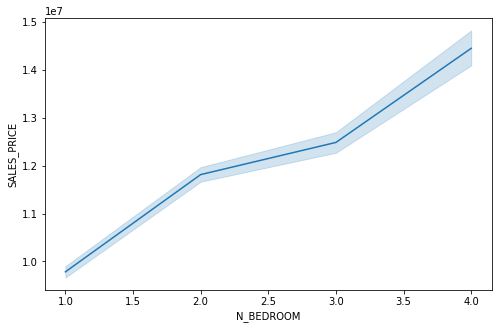

In [263]:
#24
fig=plt.figure(figsize=(8,5))
sns.lineplot(data=ds4, x="N_BEDROOM", y="SALES_PRICE")
fig.show()

This Line plot defines that "SALES_PRICE" has some linearity relationship with "N-BEDROOMS"

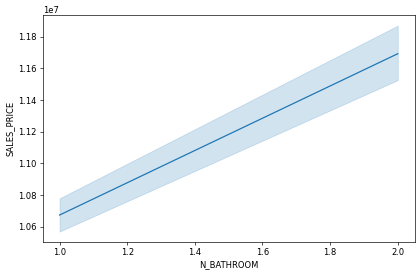

In [264]:
#25
fig=plt.figure(figsize=(8,5),dpi=60)
sns.lineplot(data=ds4, x="N_BATHROOM", y="SALES_PRICE")
fig.show()

This Line plot defines that "SALES_PRICE" has some linearity relationship with "N-BATHROOMS"

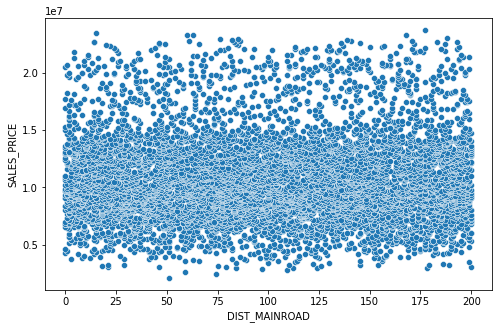

In [265]:
#26
fig=plt.figure(figsize=(8,5),)
sns.scatterplot(data=ds4, x="DIST_MAINROAD", y="SALES_PRICE")
fig.show()

This scatter plot defines that there is not any linear relationship wiht the feature "DIST_MAINROAD"..Hence we can drop this column

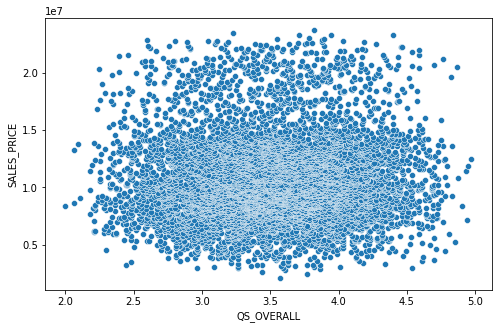

In [266]:
#27
fig=plt.figure(figsize=(8,5))
sns.scatterplot(data=ds4, x="QS_OVERALL", y="SALES_PRICE")
fig.show()

This scatter plot defines that there is not any linear relationship wiht the feature "QS_OVERALL"..Hence we can drop this column

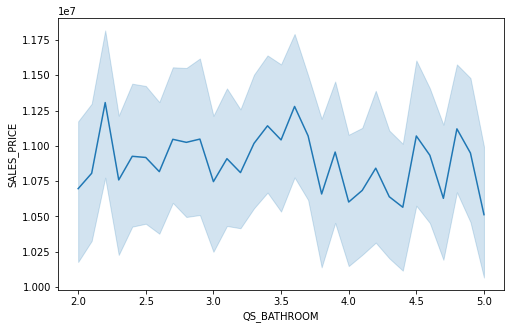

In [267]:
#28
fig=plt.figure(figsize=(8,5))
sns.lineplot(data=ds4, x="QS_BATHROOM", y="SALES_PRICE")
fig.show()


From this plot we could not conclude any type of relationship from the "QS_BATHROOM" feature

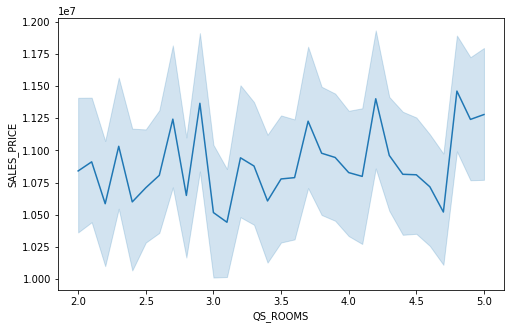

In [268]:
#29
fig=plt.figure(figsize=(8,5))
sns.lineplot(data=ds4, x="QS_ROOMS", y="SALES_PRICE")
fig.show()

From this plot we could not conclude any type of relationship from the "QS_ROOMS" feature

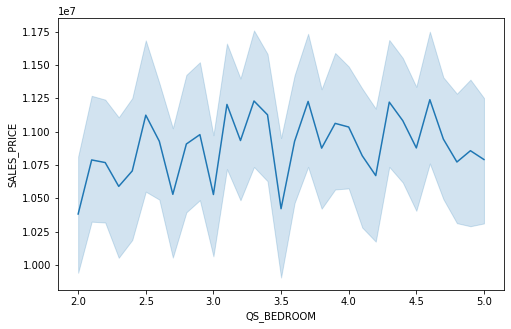

In [269]:
#30
fig=plt.figure(figsize=(8,5))
sns.lineplot(data=ds4, x="QS_BEDROOM", y="SALES_PRICE")
fig.show()

From this plot we could not conclude any type of relationship from the "QS_BEDROOMS" feature

In [270]:
ds4 = ds4.drop(columns = ['QS_OVERALL'])
ds4 = ds4.drop(columns = ['DIST_MAINROAD'])
ds4 = ds4.drop(columns = ['QS_BEDROOM'])
ds4 = ds4.drop(columns = ['QS_ROOMS'])
ds4 = ds4.drop(columns = ['QS_BATHROOM'])
ds4 = ds4.drop(columns = ['REG_FEE'])
ds4 = ds4.drop(columns = ['COMMIS'])

## **WE DROPPED THE ABOVE 4 COLUMNS ON TWO BASIS**

### > HIGHLY CORRELATED

### > WITH THE HELP OF PLOTTING COULDNOT CONCUDE ANY RELATIONSHIP WITH TARGET COLUMN







# **ENCODING**

### > LABEL ENCODING



we are doing encoding according to the graphs as it as shown the relationship and the range that lies lowest to highest with sales price

### **LABEL ENCODING FOR AREA->>BEFORE & AFTER**

In [271]:
ds4["AREA"].unique()

array(['Karapakkam', 'Adyar', 'Chromepet', 'Velachery', 'K. K. Nagar',
       'T. Nagar', 'Anna Nagar'], dtype=object)

In [272]:
ds4["AREA"] = ds4["AREA"].map({'Karapakkam':0,"Adyar":1,"Chromepet":2,"Velachery":3,"K. K. Nagar":4,"Anna Nagar":5,"T. Nagar":6})

In [273]:
ds4["AREA"].unique()

array([0, 1, 2, 3, 4, 6, 5])

**LABEL ENCODING FOR SALE_COND->>BEFORE & AFTER**

In [274]:
ds4["SALE_COND"].unique()

array(['Partial', 'Family', 'AdjLand', 'Abnormal', 'Normal Sale'],
      dtype=object)

In [275]:
ds4["SALE_COND"] = ds4["SALE_COND"].map({"Partial":0,"Family":1,"Abnormal":2,"Normal Sale":3,"AdjLand":4})

In [276]:
ds4["SALE_COND"].unique()

array([0, 1, 4, 2, 3])

**LABEL ENCODING FOR PARK_FACIL->>BEFORE & AFTER**

In [277]:
ds4["PARK_FACIL"].unique()

array(['No', 'Yes'], dtype=object)

In [278]:
ds4["PARK_FACIL"] = ds4["PARK_FACIL"].map({'Yes':1,'No':0})

In [279]:
ds4["PARK_FACIL"].unique()

array([0, 1])

**LABEL ENCODING FOR BUILDTYPE->>BEFORE & AFTER**

In [280]:
ds4["BUILDTYPE"].unique()

array(['Others', 'House', 'Commercial'], dtype=object)

In [281]:
ds4["BUILDTYPE"] = ds4["BUILDTYPE"].map({'House':0,'Others':1,'Commercial':2})

In [282]:
ds4["BUILDTYPE"].unique()

array([1, 0, 2])

**LABEL ENCODING FOR UTILITY_AVAIL->>BEFORE & AFTER**

In [283]:
ds4["UTILITY_AVAIL"].unique()

array(['ELO', 'NoSeWa', 'NoSewr ', 'All Pub'], dtype=object)

In [284]:
ds4["UTILITY_AVAIL"] = ds4["UTILITY_AVAIL"].map({"ELO":0,"NoSeWa":1,"NoSewr ":2,"All Pub":3})

In [285]:
ds4["UTILITY_AVAIL"].unique()

array([0, 1, 2, 3])

**LABEL ENCODING FOR STREET->>BEFORE & AFTER**

In [286]:
ds4["STREET"].unique()

array(['No Access', 'Paved', 'Gravel'], dtype=object)

In [287]:
ds4["STREET"] = ds4["STREET"].map({'No Access':0,'Paved':1,'Gravel':2})

In [288]:
ds4["STREET"].unique()

array([0, 1, 2])

**LABEL ENCODING FOR MZZONE->>BEFORE & AFTER**

In [289]:
ds4["MZZONE"].unique()

array(['Park', 'Mall', 'Bus Stand', 'Clinic', 'Gym', 'Market'],
      dtype=object)

In [290]:
ds4["MZZONE"] = ds4["MZZONE"].map({"Park":0,"Mall":1,"Bus Stand":2,"Clinic":3,"Gym":4,"Market":5})

In [291]:
ds4["MZZONE"].unique()

array([0, 1, 2, 3, 4, 5])

In [292]:
ds4.head(2)

,AREA,INT_SQFT,PRICE_PER_SQFEET,AGE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE
4866,0,521,4139.875240,23,1.0,1.0,2,0,0,1,0,0,0,2156875
4481,0,617,4013.573744,25,1.0,1.0,2,0,0,1,1,0,0,2476375


In [293]:
ds4.shape

(7041, 14)

# **BUILDING THE MODEL**

### **LINEAR REGRESSION**

In [294]:
X = ds4[["AREA","INT_SQFT","PRICE_PER_SQFEET","N_BEDROOM","N_BATHROOM","N_ROOM","BUILDTYPE","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","AGE"]].values
y = ds4[["SALES_PRICE"]].values

In [295]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=5)


In [296]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [297]:
#equation
print("Intercept:",model_lr.intercept_)
print("Coefficient:",model_lr.coef_)


Intercept: [-9378261.74717716]
Coefficient: [[ 3.87334515e+03  6.80438556e+03  9.79377236e+02 -1.27727363e+06
  -3.92476722e+05  1.14300037e+06  6.71087582e+05  3.14409566e+04
   1.99882228e+05  3.01073156e+04  1.05968211e+05  8.59624929e+04
  -5.49424730e+03]]


In [298]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
#For training dataset
y_preds_train=model_lr.predict(X_train)
print("Prediction for training set: {}".format(y_preds_train))



Prediction for training set: [[10302953.87271485]
 [ 6764082.80897505]
 [ 8282254.93147651]
 ...
 [10857710.61427297]
 [10603459.24789841]
 [ 9304178.81061555]]


In [299]:
#for Training
y_preds_train=model_lr.predict(X_train)
meanABErr=metrics.mean_absolute_error(y_train,y_preds_train)
meanSQErr=metrics.mean_squared_error(y_train,y_preds_train)
rootMeanSQErr=np.sqrt(metrics.mean_squared_error(y_train,y_preds_train))
print("R2 Score for Linear Regression is: {:.3f}".format(model_lr.score(X_train,y_train)*100))
print("Mean Absolute Error for Linear Regression is:",meanABErr)
print("Mean Squared Error for Linear Regression is:",meanSQErr)
print("Root Mean Squared Error for Linear Regression is:",rootMeanSQErr)

R2 Score for Linear Regression is: 94.748
Mean Absolute Error for Linear Regression is: 671091.3040953662
Mean Squared Error for Linear Regression is: 748450374490.2506
Root Mean Squared Error for Linear Regression is: 865130.2644632487


In [300]:
#for Test
y_preds_test=model_lr.predict(X_test)
meanABErr=metrics.mean_absolute_error(y_test,y_preds_test)
meanSQErr=metrics.mean_squared_error(y_test,y_preds_test)
rootMeanSQErr=np.sqrt(metrics.mean_squared_error(y_test,y_preds_test))
print("R2 Score for Linear Regression is: {:.3f}".format(model_lr.score(X_test,y_test)*100))
print("Mean Absolute Error for Linear Regression is:",meanABErr)
print("Mean Squared Error for Linear Regression is:",meanSQErr)
print("Root Mean Squared Error for Linear Regression is:",rootMeanSQErr)

R2 Score for Linear Regression is: 94.714
Mean Absolute Error for Linear Regression is: 673601.3734406274
Mean Squared Error for Linear Regression is: 746153545463.1349
Root Mean Squared Error for Linear Regression is: 863801.7975572492


## **KNN REGRESSION**

In [301]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [302]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [303]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
import math
from math import sqrt

In [304]:
model_knn=KNeighborsRegressor(n_neighbors=8)
print(model_knn)
KNeighborsRegressor(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,
                    n_jobs=1,n_neighbors=8,p=2,weights='uniform')
model_knn.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=8)


KNeighborsRegressor(n_neighbors=8)

In [305]:
#for Training
y_preds_train=model_knn.predict(X_train)
meanABErr=metrics.mean_absolute_error(y_train,y_preds_train)
meanSQErr=metrics.mean_squared_error(y_train,y_preds_train)
rootMeanSQErr=np.sqrt(metrics.mean_squared_error(y_train,y_preds_train))
print("R2 Score for knn is: {:.3f}".format(model_knn.score(X_train,y_train)*100))
print("Mean Absolute Error for knn is:",meanABErr)
print("Mean Squared Error for knn is:",meanSQErr)
print("Root Mean Squared Error for knn is:",rootMeanSQErr)

R2 Score for knn is: 96.950
Mean Absolute Error for knn is: 510299.5118371212
Mean Squared Error for knn is: 434637258688.29724
Root Mean Squared Error for knn is: 659270.2470825581


In [306]:
#for Test
y_preds_test=model_knn.predict(X_test)
meanABErr=metrics.mean_absolute_error(y_test,y_preds_test)
meanSQErr=metrics.mean_squared_error(y_test,y_preds_test)
rootMeanSQErr=np.sqrt(metrics.mean_squared_error(y_test,y_preds_test))
print("R2 Score for knn is: {:.3f}".format(model_knn.score(X_test,y_test)*100))
print("Mean Absolute Error for knn is:",meanABErr)
print("Mean Squared Error for knn is:",meanSQErr)
print("Root Mean Squared Error for knn is:",rootMeanSQErr)

R2 Score for knn is: 95.800
Mean Absolute Error for knn is: 602923.2218909711
Mean Squared Error for knn is: 592943783319.7079
Root Mean Squared Error for knn is: 770028.4302022282


### **XGBOOST**

In [307]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [308]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [309]:
model_xgb=xgb.XGBRegressor()
model_xgb.fit(X_train,y_train)
print(model_xgb)

[17:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor()


In [310]:
#for Training
y_preds_train=model_xgb.predict(X_train)
meanABErr=metrics.mean_absolute_error(y_train,y_preds_train)
meanSQErr=metrics.mean_squared_error(y_train,y_preds_train)
rootMeanSQErr=np.sqrt(metrics.mean_squared_error(y_train,y_preds_train))
print("R2 Score for xgboost is: {:.3f}".format(model_xgb.score(X_train,y_train)*100))
print("Mean Absolute Error for xgboost is:",meanABErr)
print("Mean Squared Error for xgboost is:",meanSQErr)
print("Root Mean Squared Error for xgboost is:",rootMeanSQErr)

R2 Score for xgboost is: 99.366
Mean Absolute Error for xgboost is: 236253.9440814394
Mean Squared Error for xgboost is: 90390194616.94722
Root Mean Squared Error for xgboost is: 300649.62101580505


In [311]:
#for Test
y_preds_test=model_xgb.predict(X_test)
meanABErr=metrics.mean_absolute_error(y_test,y_preds_test)
meanSQErr=metrics.mean_squared_error(y_test,y_preds_test)
rootMeanSQErr=np.sqrt(metrics.mean_squared_error(y_test,y_preds_test))
print("R2 Score for xgboost is: {:.3f}".format(model_xgb.score(X_test,y_test)*100))
print("Mean Absolute Error for xgboost is:",meanABErr)
print("Mean Squared Error for xgboost is:",meanSQErr)
print("Root Mean Squared Error for xgboost is:",rootMeanSQErr)

R2 Score for xgboost is: 99.243
Mean Absolute Error for xgboost is: 257215.74545712664
Mean Squared Error for xgboost is: 106793031966.83969
Root Mean Squared Error for xgboost is: 326792.03167586523


### **LASSO REGRESSION**

In [312]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=20)

In [313]:
from sklearn.linear_model import Lasso
model_lasso=Lasso(alpha=0.01)
model_lasso.fit(X_train,y_train)
print(model_lasso)

Lasso(alpha=0.01)


In [314]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#for Training
y_preds_train=model_lasso.predict(X_train)
meanABErr=metrics.mean_absolute_error(y_train,y_preds_train)
meanSQErr=metrics.mean_squared_error(y_train,y_preds_train)
rootMeanSQErr=np.sqrt(metrics.mean_squared_error(y_train,y_preds_train))
print("R2 Score for Lasso Regression is: {:.3f}".format(model_lasso.score(X_train,y_train)*100))
print("Mean Absolute Error for Lasso Regression is:",meanABErr)
print("Mean Squared Error for Lasso Regression is:",meanSQErr)
print("Root Mean Squared Error for Lasso Regression is:",rootMeanSQErr)

R2 Score for Lasso Regression is: 94.765
Mean Absolute Error for Lasso Regression is: 664247.87140124
Mean Squared Error for Lasso Regression is: 743596288119.4935
Root Mean Squared Error for Lasso Regression is: 862320.2932318673


In [315]:
#For Test
y_preds_test=model_lasso.predict(X_test)
meanABErr=metrics.mean_absolute_error(y_test,y_preds_test)
meanSQErr=metrics.mean_squared_error(y_test,y_preds_test)
rootMeanSQErr=np.sqrt(metrics.mean_squared_error(y_test,y_preds_test))
print("R2 Score for Lasso Regression is: {:.3f}".format(model_lasso.score(X_test,y_test)*100))
print("Mean Absolute Error for Lasso Regression is:",meanABErr)
print("Mean Squared Error for Lasso Regression is:",meanSQErr)
print("Root Mean Squared Error for Lasso Regression is:",rootMeanSQErr)

R2 Score for Lasso Regression is: 94.673
Mean Absolute Error for Lasso Regression is: 687701.9074347905
Mean Squared Error for Lasso Regression is: 759507952682.5465
Root Mean Squared Error for Lasso Regression is: 871497.5345246517


**Ridge Regression**

In [316]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [317]:
from sklearn.linear_model import Ridge
model_ridge=Ridge(alpha=0.04)
model_ridge.fit(X_train,y_train)
print(model_ridge)

Ridge(alpha=0.04)


In [318]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#for Training
y_preds_train=model_ridge.predict(X_train)
meanABErr=metrics.mean_absolute_error(y_train,y_preds_train)
meanSQErr=metrics.mean_squared_error(y_train,y_preds_train)
rootMeanSQErr=np.sqrt(metrics.mean_squared_error(y_train,y_preds_train))
print("R2 Score for Ridge Regression is: {:.3f}".format(model_ridge.score(X_train,y_train)*100))
print("Mean Absolute Error for Ridge Regression is:",meanABErr)
print("Mean Squared Error for Ridge Regression is:",meanSQErr)
print("Root Mean Squared Error for Ridge Regression is:",rootMeanSQErr)



R2 Score for Ridge Regression is: 94.750
Mean Absolute Error for Ridge Regression is: 670843.4948411051
Mean Squared Error for Ridge Regression is: 745508497542.4462
Root Mean Squared Error for Ridge Regression is: 863428.3395525342


In [319]:
#For Test
y_preds_test=model_ridge.predict(X_test)
meanABErr=metrics.mean_absolute_error(y_test,y_preds_test)
meanSQErr=metrics.mean_squared_error(y_test,y_preds_test)
rootMeanSQErr=np.sqrt(metrics.mean_squared_error(y_test,y_preds_test))
print("R2 Score for Ridge Regression is: {:.3f}".format(model_ridge.score(X_test,y_test)*100))
print("Mean Absolute Error for Ridge Regression is:",meanABErr)
print("Mean Squared Error for Ridge Regression is:",meanSQErr)
print("Root Mean Squared Error for Ridge Regression is:",rootMeanSQErr)



R2 Score for Ridge Regression is: 94.715
Mean Absolute Error for Ridge Regression is: 669295.2598695332
Mean Squared Error for Ridge Regression is: 754796043747.209
Root Mean Squared Error for Ridge Regression is: 868789.9882867027


### **ELASTICNET REGRESSION**

In [320]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [321]:
from sklearn.linear_model import ElasticNet
model_en=ElasticNet(alpha=0.05)
model_en.fit(X_train,y_train)
print(model_en)

ElasticNet(alpha=0.05)


In [322]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#for Training
y_preds_train=model_en.predict(X_train)
meanABErr=metrics.mean_absolute_error(y_train,y_preds_train)
meanSQErr=metrics.mean_squared_error(y_train,y_preds_train)
rootMeanSQErr=np.sqrt(metrics.mean_squared_error(y_train,y_preds_train))
print("R2 Score for ElasticNet Regression is: {:.3f}".format(model_en.score(X_train,y_train)*100))
print("Mean Absolute Error for ElasticNet Regression is:",meanABErr)
print("Mean Squared Error for ElasticNet Regression is:",meanSQErr)
print("Root Mean Squared Error for ElasticNet Regression is:",rootMeanSQErr)


R2 Score for ElasticNet Regression is: 94.650
Mean Absolute Error for ElasticNet Regression is: 663852.0343415682
Mean Squared Error for ElasticNet Regression is: 750764519133.45
Root Mean Squared Error for ElasticNet Regression is: 866466.6866841736


In [323]:
#For Test
y_preds_test=model_en.predict(X_test)
meanABErr=metrics.mean_absolute_error(y_test,y_preds_test)
meanSQErr=metrics.mean_squared_error(y_test,y_preds_test)
rootMeanSQErr=np.sqrt(metrics.mean_squared_error(y_test,y_preds_test))
print("R2 Score for ElasticNet Regression is: {:.3f}".format(model_en.score(X_test,y_test)*100))
print("Mean Absolute Error for ElasticNet Regression is:",meanABErr)
print("Mean Squared Error for ElasticNet Regression is:",meanSQErr)
print("Root Mean Squared Error for ElasticNet Regression is:",rootMeanSQErr)

R2 Score for ElasticNet Regression is: 94.609
Mean Absolute Error for ElasticNet Regression is: 680829.9789435547
Mean Squared Error for ElasticNet Regression is: 796875246537.3389
Root Mean Squared Error for ElasticNet Regression is: 892678.6916563758


In [324]:
model_train = pd.DataFrame({'model_name':['LinearRegression','KNN',"Xgboost",'Lasso','Ridge',"ElasticNet"],'r2_score_Train':[94.748,96.950,99.366,94.673,94.750,94.650]})
model_train

,model_name,r2_score_Train
0,LinearRegression,94.748
1,KNN,96.950
2,Xgboost,99.366
3,Lasso,94.673
4,Ridge,94.750
5,ElasticNet,94.650


In [325]:
model_test = pd.DataFrame({'model_name':['LinearRegression','KNN',"Xgboost",'Lasso','Ridge',"ElasticNet"],'r2_score_Test':[94.714,95.800,99.243,94.673,94.715,94.609]})
model_test

,model_name,r2_score_Test
0,LinearRegression,94.714
1,KNN,95.800
2,Xgboost,99.243
3,Lasso,94.673
4,Ridge,94.715
5,ElasticNet,94.609


# **Conclusion**

### **After all the required process and steps the XGBoost model gives us the best model among other models with accuracy of 99.24%**